In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

df=pd.read_excel(r'C:\Users\nikhi\ML Lab 3-1\ML Datasets\colors.xlsx')

x = df['color']
y = df['match']

vectorizer = CountVectorizer()
x_vectorized = vectorizer.fit_transform(x)

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_vectorized, y)

df

,color,match
0,red,green
1,blue,red
2,pink,yellow
3,green,blue
4,red,yellow
5,red,blue


In [5]:

def predict(user_color):
    ipvector = vectorizer.transform([user_color])
    neighbors = knn_model.kneighbors(ipvector, return_distance=False)
    predictions = [y.iloc[i] for i in neighbors[0]]
    return predictions

ucolor = input("Enter a color: ")
predicted_matches = predict(ucolor)
print(f"The matching colors for '{ucolor}' are:")

for i in predicted_matches:
    print(i)


Enter a color: green
The matching colors for 'green' are:
blue
red
yellow


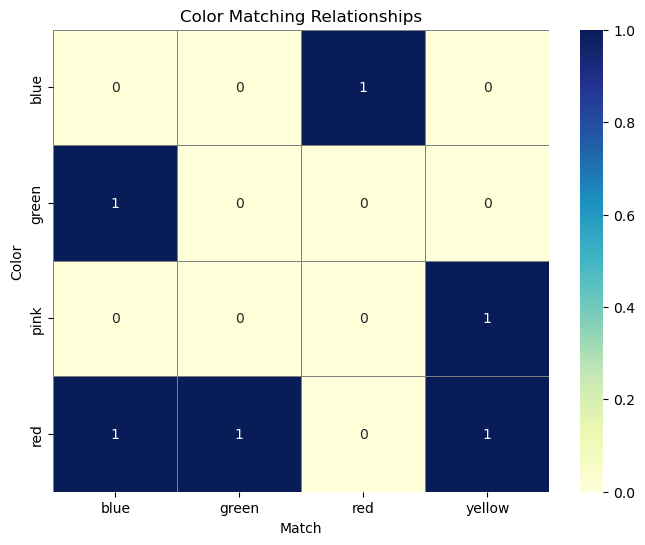

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
crosstab = pd.crosstab(df['color'], df['match'])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab, annot=True, cmap="YlGnBu", cbar=True, linewidths=0.5, linecolor="gray")
plt.title("Color Matching Relationships")
plt.xlabel("Match")
plt.ylabel("Color")

plt.show()